In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
heart_df = pd.read_csv('heart.csv')

In [3]:
# Display the first few rows of the dataset
heart_df.head(12)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
8,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
9,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0


In [4]:
heart_df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [5]:
heart_df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
heart_df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
heart_df['target'].value_counts()

target
1    526
0    499
Name: count, dtype: int64

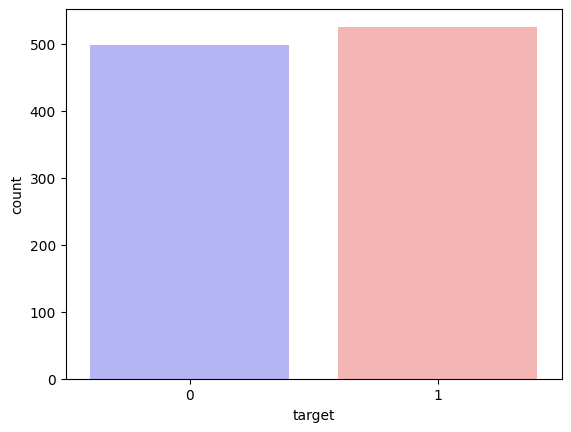

In [8]:
sns.countplot(x="target", data=heart_df, palette="bwr")
plt.show()

In [9]:
countNoDisease = len(heart_df[heart_df.target == 0])
countHaveDisease = len(heart_df[heart_df.target == 1])
print("Percentage of Patients Haven't Heart Disease: {:.2f}%".format((countNoDisease / (len(heart_df.target))*100)))
print("Percentage of Patients Have Heart Disease: {:.2f}%".format((countHaveDisease / (len(heart_df.target))*100)))

Percentage of Patients Haven't Heart Disease: 48.68%
Percentage of Patients Have Heart Disease: 51.32%


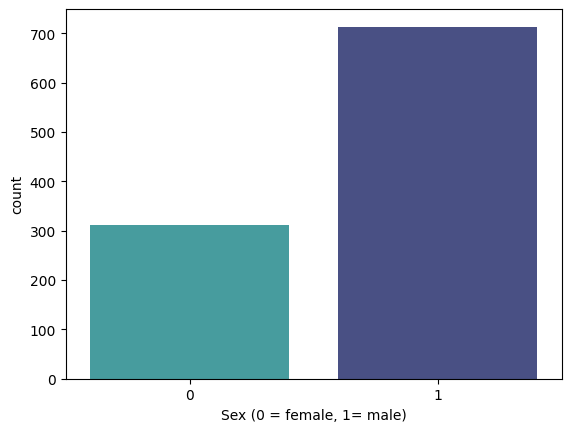

In [10]:
sns.countplot(x='sex', data=heart_df, palette="mako_r")
plt.xlabel("Sex (0 = female, 1= male)")
plt.show()

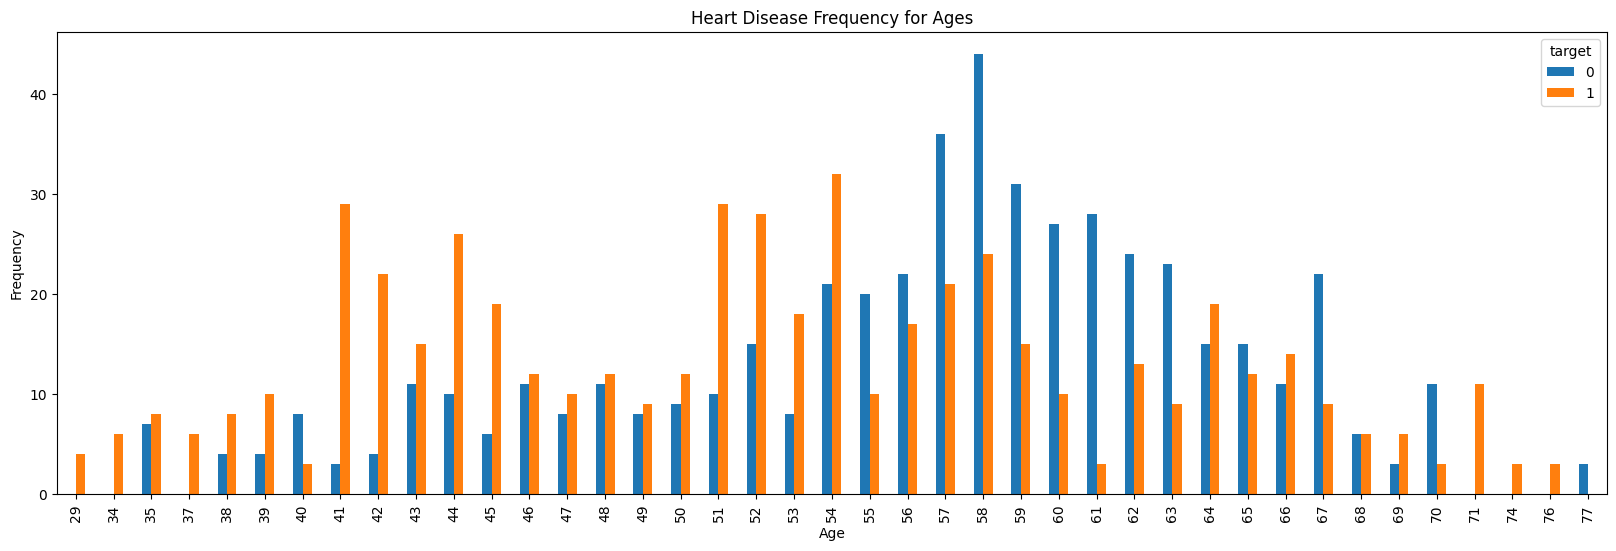

In [11]:
pd.crosstab(heart_df.age,heart_df.target).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('heartDiseaseAndAges.png')
plt.show()

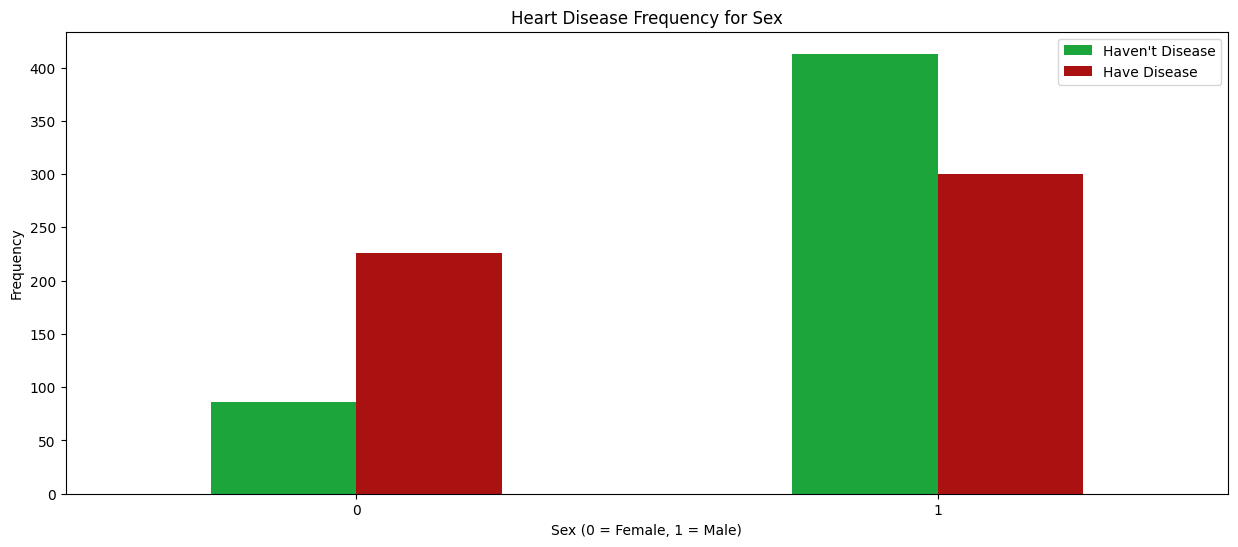

In [12]:
pd.crosstab(heart_df.sex,heart_df.target).plot(kind="bar",figsize=(15,6),color=['#1CA53B','#AA1111' ])
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()
plt.show()

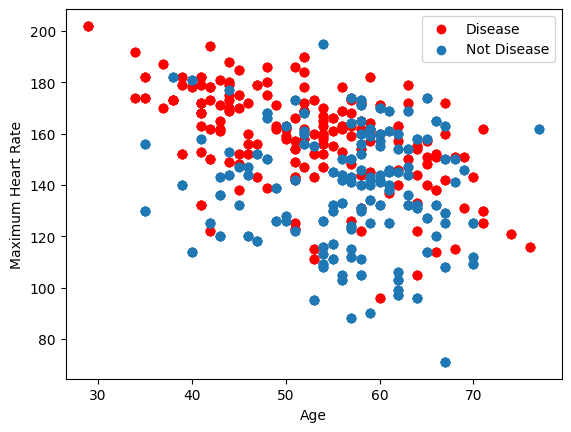

In [13]:
plt.scatter(x=heart_df.age[heart_df.target==1], y=heart_df.thalach[(heart_df.target==1)], c="red")
plt.scatter(x=heart_df.age[heart_df.target==0], y=heart_df.thalach[(heart_df.target==0)])
plt.legend(["Disease", "Not Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()

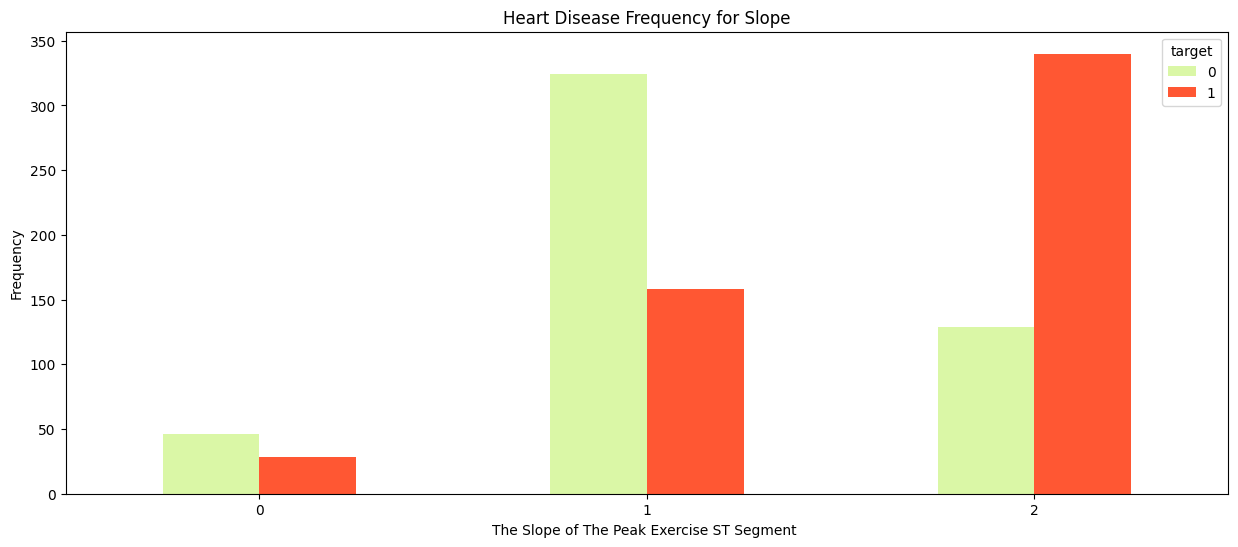

In [14]:
pd.crosstab(heart_df.slope,heart_df.target).plot(kind="bar",figsize=(15,6),color=['#DAF7A6','#FF5733' ])
plt.title('Heart Disease Frequency for Slope')
plt.xlabel('The Slope of The Peak Exercise ST Segment ')
plt.xticks(rotation = 0)
plt.ylabel('Frequency')
plt.show()

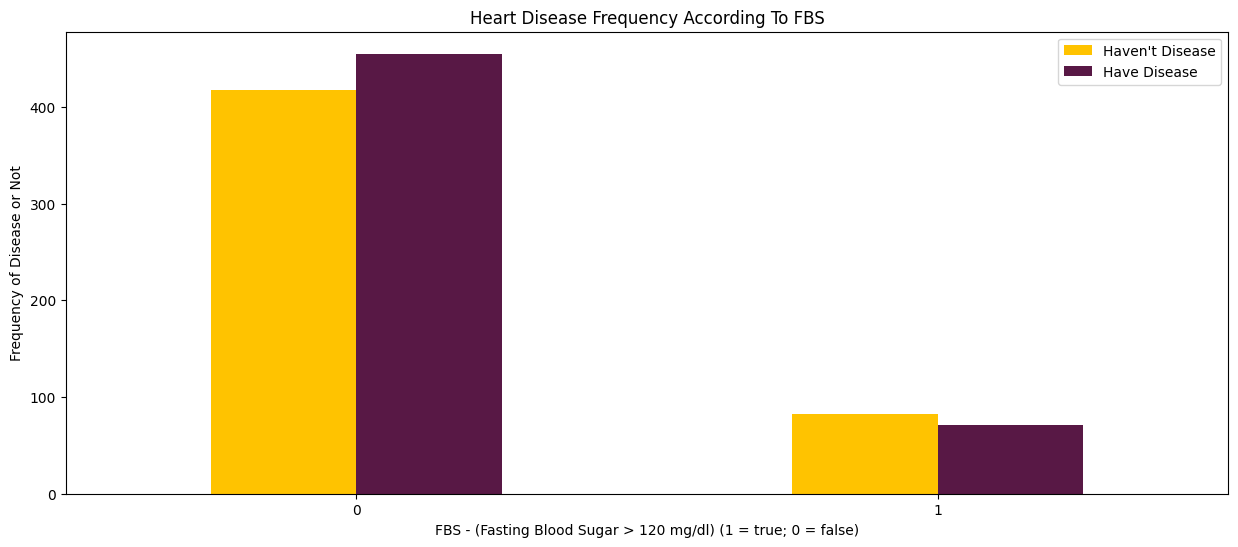

In [15]:
pd.crosstab(heart_df.fbs,heart_df.target).plot(kind="bar",figsize=(15,6),color=['#FFC300','#581845' ])
plt.title('Heart Disease Frequency According To FBS')
plt.xlabel('FBS - (Fasting Blood Sugar > 120 mg/dl) (1 = true; 0 = false)')
plt.xticks(rotation = 0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency of Disease or Not')
plt.show()

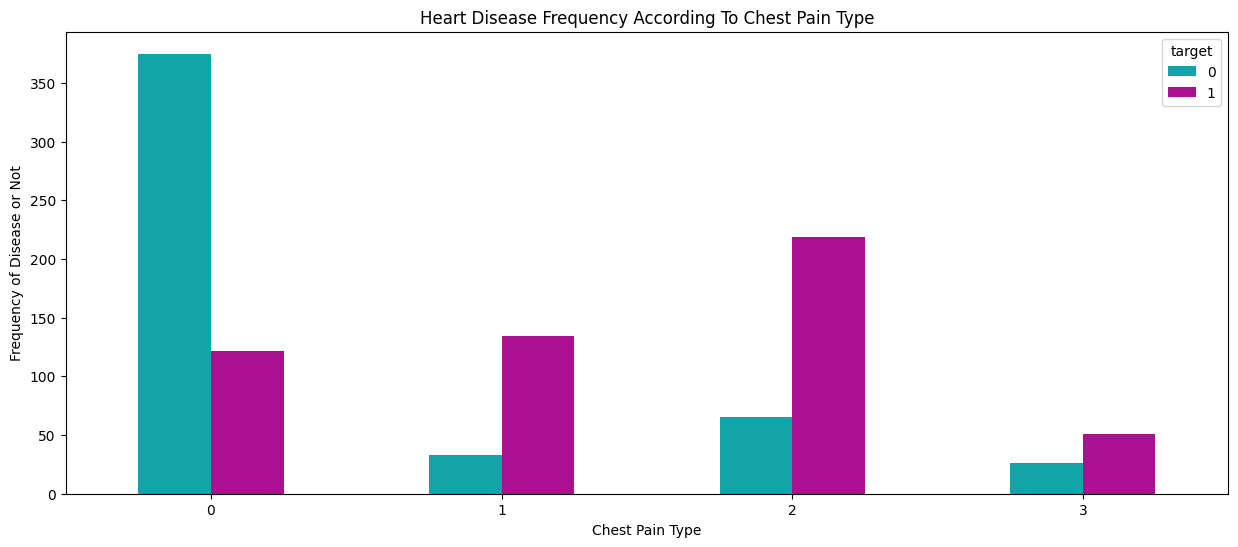

In [16]:
pd.crosstab(heart_df.cp,heart_df.target).plot(kind="bar",figsize=(15,6),color=['#11A5AA','#AA1190' ])
plt.title('Heart Disease Frequency According To Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.xticks(rotation = 0)
plt.ylabel('Frequency of Disease or Not')
plt.show()

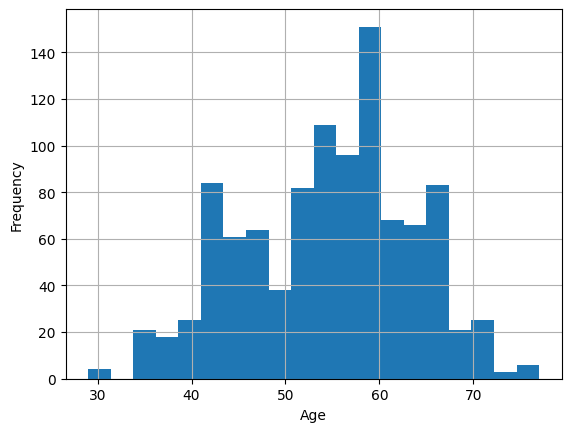

In [17]:
heart_df['age'].hist(bins=20)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

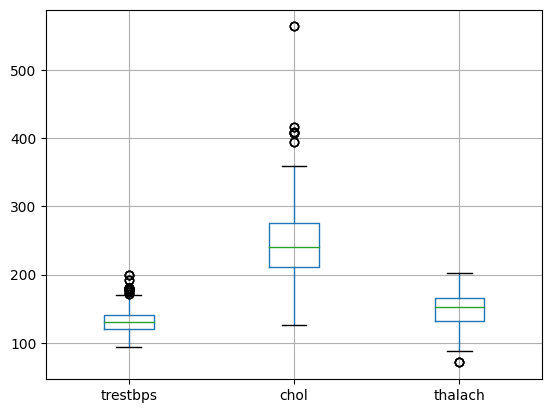

In [18]:
heart_df.boxplot(column=['trestbps', 'chol', 'thalach'])
plt.show()

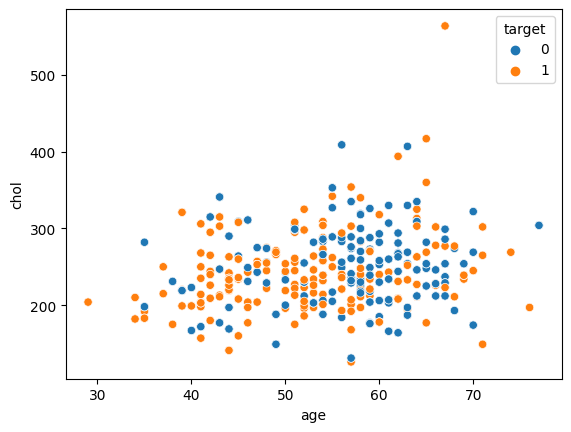

In [19]:
sns.scatterplot(x='age', y='chol', hue='target', data=heart_df)
plt.show()

In [20]:
corr = heart_df.corr

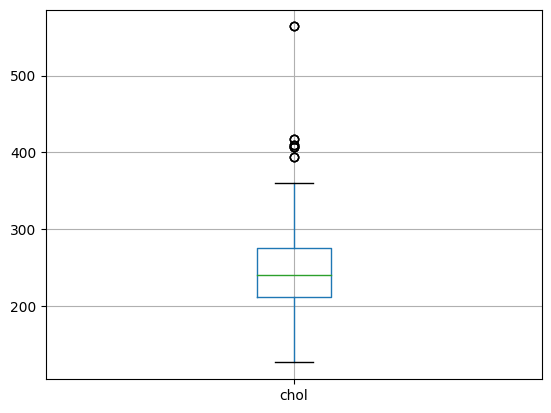

In [21]:
heart_df.boxplot(column='chol')
plt.show()

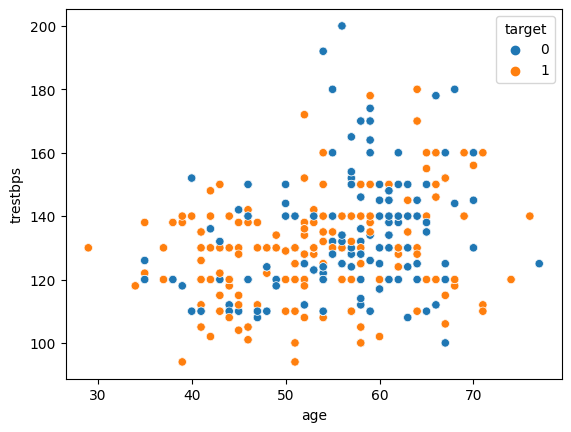

In [22]:
sns.scatterplot(x='age', y='trestbps', hue='target', data=heart_df)
plt.show()

In [23]:
heart_df.groupby('sex')['chol'].mean()

sex
0    261.455128
1    239.237027
Name: chol, dtype: float64

In [24]:
heart_df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [25]:
from scipy import stats
z_scores = np.abs(stats.zscore(heart_df))
threshold = 3
outlier_indices = np.where(z_scores > threshold)

In [26]:
heart_df = heart_df[(z_scores < threshold).all(axis=1)]

In [27]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
heart_df = pd.DataFrame(scaler.fit_transform(heart_df), columns=heart_df.columns)

In [28]:
correlation = heart_df.corr()
correlation_with_target = abs(correlation['target'])
relevant_features = correlation_with_target[correlation_with_target > 0.2]
heart_df = heart_df[relevant_features.index]

In [29]:
heart_df.head(10)

,age,sex,cp,thalach,exang,oldpeak,slope,ca,thal,target
0,0.479167,1.0,0.0,0.701754,0.0,0.227273,1.0,0.666667,1.0,0.0
1,0.500000,1.0,0.0,0.587719,1.0,0.704545,0.0,0.000000,1.0,0.0
2,0.854167,1.0,0.0,0.324561,1.0,0.590909,0.0,0.000000,1.0,0.0
3,0.666667,1.0,0.0,0.640351,0.0,0.000000,1.0,0.333333,1.0,0.0
4,0.687500,0.0,0.0,0.157895,0.0,0.431818,0.5,1.000000,0.5,0.0
5,0.604167,0.0,0.0,0.298246,0.0,0.227273,0.5,0.000000,0.5,1.0
6,0.604167,1.0,0.0,0.456140,0.0,1.000000,0.0,1.000000,0.0,0.0
7,0.541667,1.0,0.0,0.500000,1.0,0.181818,0.5,0.333333,1.0,0.0
8,0.354167,1.0,0.0,0.491228,0.0,0.181818,1.0,0.000000,1.0,0.0
9,0.520833,1.0,0.0,0.245614,1.0,0.727273,0.5,0.666667,0.5,0.0


In [30]:
heart_df.target.value_counts()

target
1.0    502
0.0    467
Name: count, dtype: int64

In [31]:
X = heart_df.drop('target',axis=1)
y = heart_df.target.values

In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42)


In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

models = [
    {
        'name': 'Random Forest',
        'model': RandomForestClassifier(),
        'params': {
            'n_estimators': [50, 100, 150],
            'max_depth': [5, 10, 15],
            'min_samples_split': [2, 5, 10]
        }
    },
    {
        'name': 'K-Nearest Neighbors',
        'model': KNeighborsClassifier(),
        'params': {
            'n_neighbors': [3, 5, 7,9],
            'weights': ['uniform', 'distance'],
            'p': [1, 2]
        }
    },
    {
        'name': 'Logistic Regression',
        'model': LogisticRegression(),
        'params': {
            'C': [0.1, 1, 10],
            'penalty': ['l1', 'l2']
        }
    },
    {
        'name': 'Naive Bayes',
        'model': GaussianNB(),
        'params': {}
    },
    {
        'name': 'SVM',
        'model': SVC(),
        'params': {
            'C': [0.1, 1, 10],
            'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
        }
    },
    {
        'name': 'Decision Tree',
        'model': DecisionTreeClassifier(),
        'params': {
            'max_depth': [5, 10, 15],
            'min_samples_split': [2, 5, 10]
        }
    }
]


In [35]:
best_model = None
best_score = 0
results = []
for model in models:
    clf = GridSearchCV(model['model'], model['params'], cv=5)
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    results.append((model['name'], score, clf.best_params_))
    if score > best_score:
        best_score = score
        best_model = clf
    print(model['name'], 'Accuracy:', score)

Random Forest Accuracy: 0.9823529411764705
K-Nearest Neighbors Accuracy: 0.9823529411764705


/home/v2dent/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
15 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/home/v2dent/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/v2dent/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/home/v2dent/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
   

Logistic Regression Accuracy: 0.8470588235294118
Naive Bayes Accuracy: 0.8352941176470589
SVM Accuracy: 0.9029411764705882
Decision Tree Accuracy: 0.9529411764705882


In [36]:
print('Best Model:', best_model.best_estimator_)
print('Best Parameters:', best_model.best_params_)

Best Model: RandomForestClassifier(max_depth=15, n_estimators=150)
Best Parameters: {'max_depth': 15, 'min_samples_split': 2, 'n_estimators': 150}


In [37]:
import joblib

joblib.dump(best_model, 'heart_disease_model.joblib')

['heart_disease_model.joblib']

In [38]:
import joblib
import pandas as pd

# load the dumped model
model = joblib.load('heart_disease_model.joblib')

# create new input data
new_data = pd.DataFrame({
    'age': [54, 39, 65, 43, 57],
    'sex': [1, 0, 1, 1, 0],
    'cp': [2, 0, 3, 1, 0],
    'thalach': [150, 180, 120, 175, 160],
    'exang': [0, 0, 1, 0, 1],
    'oldpeak': [0.5, 2.0, 3.0, 1.5, 0.8],
    'slope': [2, 1, 2, 1, 1],
    'ca': [0, 0, 1, 0, 0],
    'thal': [2, 2, 3, 2, 2]
})

# make predictions on the new data
predictions = model.predict(new_data)

# output the predicted target values
print(predictions)

[1. 0. 0. 1. 0.]


In [39]:
from sklearn.metrics import classification_report

In [40]:
prediction = model.predict(X_test)

In [41]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98       160
         1.0       0.98      0.98      0.98       180

    accuracy                           0.98       340
   macro avg       0.98      0.98      0.98       340
weighted avg       0.98      0.98      0.98       340



In [42]:
# Convert the results to a DataFrame
df_results = pd.DataFrame(results, columns=['Model', 'Score', 'Best Params'])

In [43]:
# Sort the results by score in descending order
df_results.sort_values(by='Score', ascending=False, inplace=True)

# Reset the index of the DataFrame
df_results.reset_index(drop=True, inplace=True)

# Print the DataFrame
df_results

,Model,Score,Best Params
0,Random Forest,0.982353,"{'max_depth': 15, 'min_samples_split': 2, 'n_e..."
1,K-Nearest Neighbors,0.982353,"{'n_neighbors': 7, 'p': 1, 'weights': 'distance'}"
2,Decision Tree,0.952941,"{'max_depth': 15, 'min_samples_split': 2}"
3,SVM,0.902941,"{'C': 10, 'kernel': 'poly'}"
4,Logistic Regression,0.847059,"{'C': 10, 'penalty': 'l2'}"
5,Naive Bayes,0.835294,{}


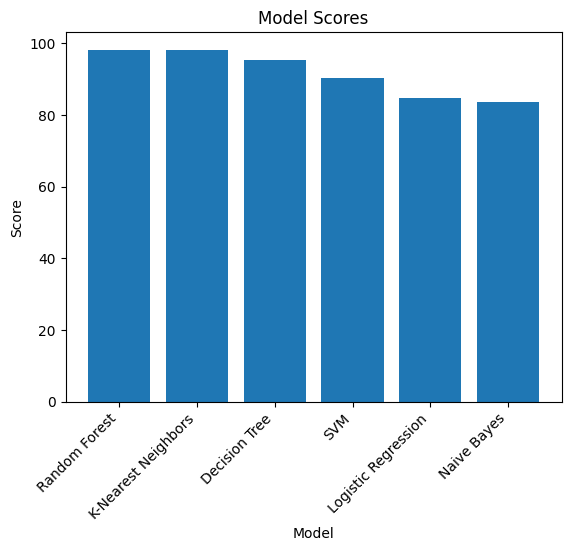

In [49]:

# Create a list with the model names
models = list(df_results['Model'])

# Create a list with the scores
scores = list(df_results['Score']*100)

# Create a bar plot
plt.bar(models, scores)

# Set the title and labels
plt.title('Model Scores')
plt.xlabel('Model')
plt.ylabel('Score')

# Adjust the spacing of the x-axis ticks
plt.xticks(np.arange(len(models)), models, rotation=45, ha='right')

# Save the plot as a PNG image
plt.savefig('bar_results.png')
# Display the plot
plt.show()

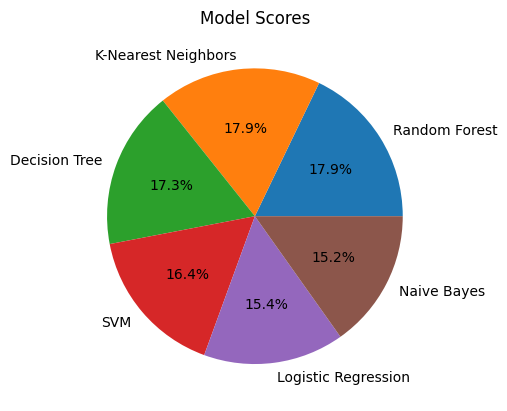

In [45]:
# Create a pie chart
plt.pie(scores, labels=models, autopct='%1.1f%%')

# Set the title
plt.title('Model Scores')

# Display the plot
plt.show()